# Problem Set 3: Neural Networks

This assignment requires a working IPython Notebook installation, which you should already have. If not, please refer to the instructions in the course resources.

The programming part is adapted from [Stanford CS231n](http://cs231n.stanford.edu/).

### In part 2 (programming) of this assignment, you DO NOT need to make any modification code in this IPython Notebook. Instead you will implement your own simple neural network in the mlp.py file. Please attach your written solutions for part 1 and part 3 in this IPython Notebook.

Total: 80 points.

## [30pts] Problem 1: Backprop in a simple MLP
This problem asks you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.
</p>

<img src="mlpgraph.png" style="height:200px;">

The forward and backward computation are given below. NOTE: We assume no regularization, so you can omit the terms involving $\Omega$.

The forward step is: 

<img src="forward.png" style="width:500px;">

and the backward step is:

<img src="backward.png" style="width:500px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. 
We start by giving an example. Note that $\odot$ stands for element-wise multiplication.

$ \nabla_{\hat{y}}L(\hat{y},y) =  \nabla_{\hat{y}}[-yln(\hat{y}) - (1-y)ln(1-\hat{y})] = \frac{\hat{y}-y}{(1-\hat{y})\hat{y}} = \frac{h^{(2)}-y}{(1-h^{(2)})h^{(2)}}$

Next, please derive the following.

<i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  

**Useful information about vectorized chain rule and backpropagation**:
<br> If you are struggling with computing the vectorized version of chain rule for the backpropagation question in problem set 4, you may find this example helpful:
https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
<br> It also contains some helpful shortcuts for computing gradients.

**[5pts] Q1.1**: $\nabla_{a^{(2)}}J$

$\nabla_{a^{(2)}}J = \frac{\partial J}{\partial h^{(2)}}\frac{\partial h^{(2)}}{\partial a^{(2)}} = \frac{h^{(2)}-y}{(1-h^{(2)})h^{(2)}}{(1-h^{(2)})h^{(2)}} = {h^{(2)}-y}$ 

**[5pts] Q1.2**: $\nabla_{b^{(2)}}J$

$\nabla_{b^{(2)}}J = \frac{\partial J}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial b^{(2)}} = \frac{1}{N}\sum_{i=1}^N ({h^{(2)}-y})$

**[5pts] Q1.3**: $\nabla_{W^{(2)}}J$ <br><i>Hint: this should be a vector, since $W^{(2)}$ is a vector. </i>

$\nabla_{W^{(2)}}J = \frac{\partial J}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial w^{(2)}} = h^{(1)T}({h^{(2)}-y})$

**[5pts] Q1.4**: $\nabla_{h^{(1)}}J$ 

$\nabla_{h^{(1)}}J = \frac{\partial J}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial h^{(1)}} = ({h^{(2)}-y})W^{(2)T}$

**[5pts] Q1.5**: $\nabla_{b^{(1)}}J$, $\nabla_{W^{(1)}}J$

$$\nabla_{b^{(1)}}J = \frac{\partial J}{\partial h^{(1)}}\frac{\partial h^{(1)}}{\partial a^{(1)}}\frac{\partial a^{(1)}}{\partial b^{(1)}} = \frac{1}{N}\sum_{i=1}^N [{(h^{(2)}-y)W^{(2)T}\odot(1-h^{(1)})h^{(1)}}]$$
$$\nabla_{w^{(1)}}J = \frac{\partial J}{\partial h^{(1)}}\frac{\partial h^{(1)}}{\partial a^{(1)}}\frac{\partial a^{(1)}}{\partial w^{(1)}} = x^{T}[{(h^{(2)}-y)W^{(2)T}\odot(1-h^{(1)})h^{(1)}}]$$



**[5pts] Q1.6** Briefly, explain how the computational speed of backpropagation would be affected if it did not include a forward pass

The kernels $a^{(i)}$ and the activations $h^{(i)}$, which are important vectors to compute gradients, can be stored through the process of forward prop in each iteration, hence it makes the back prop faster. If there is no $a^{(i)}$ and $h^{(i)}$ cached, we need to caculate the gradients from input X each time, which is computational inefficient.

## [30pts] Problem 2 (Programming): Implementing a simple MLP
In this problem we will develop a neural network with fully-connected layers, or Multi-Layer Perceptron (MLP). We will use it in classification tasks.

In the current directory, you can find a file `mlp.py`, which contains the definition for class `TwoLayerMLP`. As the name suggests, it implements a 2-layer MLP, or MLP with 1 *hidden* layer. You will implement your code in the same file, and call the member functions in this notebook. Below is some initialization. The `autoreload` command makes sure that `mlp.py` is periodically reloaded.

In [1]:
# setup
import numpy as np
import matplotlib.pyplot as plt
from mlp import TwoLayerMLP

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Next we initialize a toy model and some toy data, the task is to classify five 4-d vectors.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model(actv, std=1e-1):
    np.random.seed(0)
    return TwoLayerMLP(input_size, hidden_size, num_classes, std=std, activation=actv)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print('X = ', X)
print()
print('y = ', y)

X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]

y =  [0 1 2 2 1]


### [5pts] Q2.1 Forward pass: Sigmoid
Our 2-layer MLP uses a softmax output layer (**note**: this means that you don't need to apply a sigmoid on the output) and the multiclass cross-entropy loss to perform classification.

**Softmax function**: 
<br> For class j:
$$P(y=j|x) = \frac{\exp(z_j)}{\sum_{k=1}^{K} \exp(z_k)}$$
**Multiclass cross-entropy loss function**: 
<br> y - binary indicator (0 or 1) if class label c is the correct classification  
$$J \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \sum_{c=1}^{C} \ [ \ -y_{(c)} log(P(y_{(c)}|x^{(i)})) \ ]$$

Please take a look at method `TwoLayerMLP.loss` in the file `mlp.py`. This function takes in the data and weight parameters, and computes the class scores (aka logits), the loss $L$, and the gradients on the parameters. 

- Complete the implementation of forward pass (up to the computation of `scores`) for the sigmoid activation: $\sigma(x)=\frac{1}{1+exp(-x)}$.

**Note 1**: Softmax cross entropy loss involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp). This can result in numerical underflow/overflow. Read about the solution in the link, and try to understand the calculation of `loss` in the code.

**Note 2**: You're strongly encouraged to implement in a vectorized way and avoid using slower `for` loops. Note that most numpy functions support vector inputs.

Check the correctness of your forward pass below. The difference should be very small (<1e-6).

In [3]:
net = init_toy_model('sigmoid')
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.182248
print(loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

1.1822479803941373
Difference between your loss and correct loss:
1.9605862711102873e-08


### [10pts] Q2.2 Backward pass: Sigmoid
- For sigmoid activation, complete the computation of `grads`, which stores the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`.

Now debug your backward pass using a numeric gradient check. Again, the differences should be very small.

In [4]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
from utils import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e'%(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 8.048892e-10
b2 max relative error: 5.553999e-11
W1 max relative error: 1.126755e-08
b1 max relative error: 2.035406e-06


### [5pts] Q2.3 Train the Sigmoid network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Then we train a two-layer network on toy data.

- Implement the prediction function `TwoLayerNet.predict`, which is called during training to keep track of training and validation accuracy.

You should get the final training loss around 0.1, which is good, but not too great for such a toy problem.  One problem is that the gradient magnitude for W1 (the first layer weights) stays small all the time, and the neural net doesn't get much "learning signals". This has to do with the saturation problem of the sigmoid activation function. 

Final training loss:  0.10926794610680679


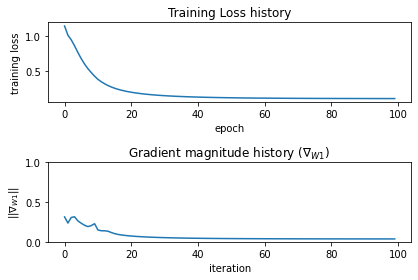

In [5]:
net = init_toy_model('sigmoid', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.5, reg=1e-5,
                  num_epochs=100, verbose=False)
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history and gradient magnitudes
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(stats['loss_history'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('training loss')
ax1.set_title('Training Loss history')
ax2.plot(stats['grad_magnitude_history'])
ax2.set_xlabel('iteration')
ax2.set_ylabel(r'$||\nabla_{W1}||$')
ax2.set_title('Gradient magnitude history ' +  r'($\nabla_{W1}$)')
ax2.set_ylim(0,1)
fig.tight_layout()
plt.show()

### [5pts] Q2.4 Using ReLU activation
The Rectified Linear Unit (ReLU) activation is also widely used: $ReLU(x)=max(0,x)$.

- Complete the implementation for the ReLU activation (forward and backward) in `mlp.py`.
- Train the network with ReLU, and report your final training loss.

Make sure you first pass the numerical gradient check on toy data.

In [6]:
net = init_toy_model('relu', std=1e-1)

loss, grads = net.loss(X, y, reg=0.1)
print('loss = ', loss)  # correct_loss = 1.320973

# The differences should all be very small
print('checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e'%(param_name, rel_error(param_grad_num, grads[param_name])))

loss =  1.3037878913298206
checking gradients
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 8.994864e-10


Now that it's working, let's train the network. Does the net get stronger learning signals (i.e. gradients) this time? Report your final training loss.

Final training loss:  0.0178562204869839


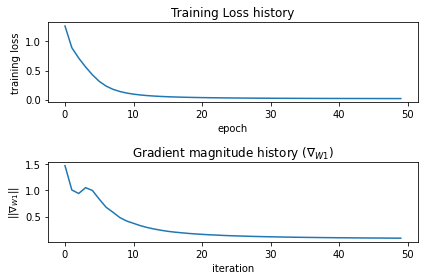

In [7]:
net = init_toy_model('relu', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(stats['loss_history'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('training loss')
ax1.set_title('Training Loss history')
ax2.plot(stats['grad_magnitude_history'])
ax2.set_xlabel('iteration')
ax2.set_ylabel(r'$||\nabla_{W1}||$')
ax2.set_title('Gradient magnitude history ' +  r'($\nabla_{W1}$)')
fig.tight_layout()
plt.show()

## Application to a real Problem

### Load MNIST data
Now that you have implemented a two-layer network that works on toy data, let's try some real data. The MNIST dataset is a standard machine learning benchmark. It consists of 70,000 grayscale handwritten digit images, which we split into 50,000 training, 10,000 validation and 10,000 testing. The images are of size 28x28, which are flattened into 784-d vectors.

**Note 1**: the function `get_MNIST_data` requires the `scikit-learn` package. If you previously did anaconda installation to set up your Python environment, you should already have it. Otherwise, you can install it following the instructions here: http://scikit-learn.org/stable/install.html

**Note 2**: If you encounter a `HTTP 500` error, that is likely temporary, just try again.

**Note 3**: Ensure that the downloaded MNIST file is 55.4MB (smaller file-sizes could indicate an incomplete download - which is possible)

In [8]:
# load MNIST
from utils import get_MNIST_data
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


### Train a network on MNIST
We will now train a network on MNIST with 64 hidden units in the hidden layer. We train it using SGD, and decrease the learning rate with an exponential rate over time; this is achieved by multiplying the learning rate with a constant factor `learning_rate_decay` (which is less than 1) after each epoch. In effect, we are using a high learning rate initially, which is good for exploring the solution space, and using lower learning rates later to encourage convergence to a local minimum (or [saddle point](http://www.offconvex.org/2016/03/22/saddlepoints/), which may happen more often).

- Train your MNIST network with 2 different activation functions: sigmoid and ReLU. 

We first define some variables and utility functions. The `plot_stats` function plots the histories of gradient magnitude, training loss, and accuracies on the training and validation sets. The `show_net_weights` function visualizes the weights learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. Both functions help you to diagnose the training process.

In [9]:
input_size = 28 * 28
hidden_size = 64
num_classes = 10

# Plot the loss function and train / validation accuracies
def plot_stats(stats):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    ax1.plot(stats['grad_magnitude_history'])
    ax1.set_title('Gradient magnitude history ' + r'$(\nabla_{W1})$')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel(r'$||\nabla_{W1}||$')
    ax1.set_ylim(0, np.minimum(100,np.max(stats['grad_magnitude_history'])))
    
    ax2.plot(stats['loss_history'])
    ax2.set_title('Loss history')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.set_ylim(0, 100)
    
    ax3.plot(stats['train_acc_history'], label='train') 
    ax3.plot(stats['val_acc_history'], label='val')
    ax3.set_title('Classification accuracy history')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Clasification accuracy')
    fig.tight_layout()
    plt.show()

# Visualize the weights of the network
from utils import visualize_grid
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(-1, 28, 28)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

### Sigmoid network

/Users/chenhaozhe/Desktop/CS542/ps3/mlp.py:89: RuntimeWarning: overflow encountered in exp
  hidden = 1/(1 + np.exp(-z1))


Epoch 1: loss 79.040004, train_acc 0.160000, val_acc 0.266300
Epoch 2: loss 49.814996, train_acc 0.500000, val_acc 0.461100
Epoch 3: loss 32.419904, train_acc 0.640000, val_acc 0.568300
Epoch 4: loss 21.756599, train_acc 0.630000, val_acc 0.639700
Epoch 5: loss 15.148895, train_acc 0.680000, val_acc 0.685000
Epoch 6: loss 10.909900, train_acc 0.680000, val_acc 0.712600
Epoch 7: loss 8.078106, train_acc 0.760000, val_acc 0.737900
Epoch 8: loss 6.166522, train_acc 0.830000, val_acc 0.755600
Epoch 9: loss 4.948016, train_acc 0.780000, val_acc 0.772900
Epoch 10: loss 4.113118, train_acc 0.760000, val_acc 0.785000
Epoch 11: loss 3.455138, train_acc 0.840000, val_acc 0.797000
Epoch 12: loss 3.026239, train_acc 0.840000, val_acc 0.808100
Epoch 13: loss 2.702231, train_acc 0.840000, val_acc 0.819600
Epoch 14: loss 2.438965, train_acc 0.820000, val_acc 0.830900
Epoch 15: loss 2.258613, train_acc 0.900000, val_acc 0.839900
Epoch 16: loss 2.166625, train_acc 0.860000, val_acc 0.846800
Epoch 17: l

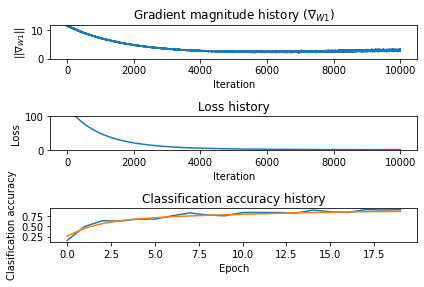

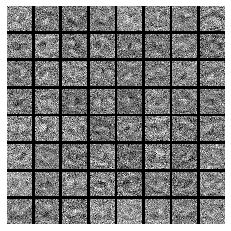

In [10]:
sigmoid_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='sigmoid', std=1e-1)

# Train the network
sigmoid_stats = sigmoid_net.train(X_train, y_train, X_val, y_val, 
                                  num_epochs=20, batch_size=100, 
                                  learning_rate=1e-3,  learning_rate_decay=0.95, 
                                  reg=0.5, verbose=True)

# Predict on the training set
train_acc = (sigmoid_net.predict(X_train) == y_train).mean()
print('Sigmoid final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (sigmoid_net.predict(X_val) == y_val).mean()
print('Sigmoid final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (sigmoid_net.predict(X_test) == y_test).mean()
print('Sigmoid test accuracy: ', test_acc)

# show stats and visualizations
plot_stats(sigmoid_stats)
show_net_weights(sigmoid_net)

### ReLU network

Epoch 1: loss 77.130582, train_acc 0.910000, val_acc 0.877000
Epoch 2: loss 47.554293, train_acc 0.940000, val_acc 0.888800
Epoch 3: loss 29.873702, train_acc 0.940000, val_acc 0.904300
Epoch 4: loss 19.525183, train_acc 0.940000, val_acc 0.921100
Epoch 5: loss 13.036040, train_acc 0.940000, val_acc 0.926300
Epoch 6: loss 8.991947, train_acc 0.940000, val_acc 0.933200
Epoch 7: loss 6.142759, train_acc 0.970000, val_acc 0.941700
Epoch 8: loss 4.525197, train_acc 0.940000, val_acc 0.945400
Epoch 9: loss 3.237140, train_acc 0.980000, val_acc 0.950700
Epoch 10: loss 2.410786, train_acc 0.970000, val_acc 0.953900
Epoch 11: loss 1.850175, train_acc 0.990000, val_acc 0.956400
Epoch 12: loss 1.394061, train_acc 0.990000, val_acc 0.959000
Epoch 13: loss 1.163070, train_acc 0.980000, val_acc 0.958800
Epoch 14: loss 0.994330, train_acc 0.940000, val_acc 0.960800
Epoch 15: loss 0.816417, train_acc 0.970000, val_acc 0.961400
Epoch 16: loss 0.682949, train_acc 0.960000, val_acc 0.962100
Epoch 17: lo

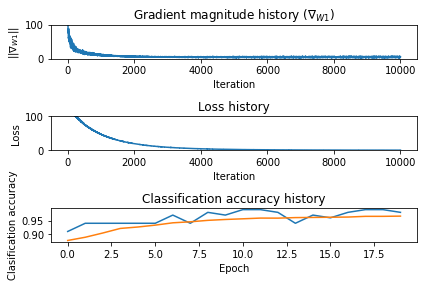

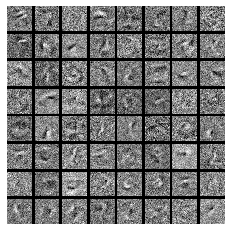

In [11]:
relu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='relu', std=1e-1)

# Train the network
relu_stats = relu_net.train(X_train, y_train, X_val, y_val, 
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, learning_rate_decay=0.95, 
                            reg=0.5, verbose=True)
# Predict on the training set
train_acc = (relu_net.predict(X_train) == y_train).mean()
print('ReLU final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (relu_net.predict(X_val) == y_val).mean()
print('ReLU final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (relu_net.predict(X_test) == y_test).mean()
print('ReLU test accuracy: ', test_acc)

# show stats and visualizations
plot_stats(relu_stats)
show_net_weights(relu_net)

### [5pts] Q2.5

Which activation function would you choose in practice? Why?

Only for binary classification problem, I'd like to choose sigmoid, otherwise I'll use relu. Since for sigmoid, if the $a^{(l)}$ is very large or very small, $\frac{dh^{(l)}}{da^{(l)}}$ goes to zero, which slow down the gradient descent and affect the model performance. The other reason relu is better than sigmoid is that relu don't have to compute np.exp(), which saves computational cost.

## [20pts] Problem 3: Simple Regularization Methods
You may have noticed the `reg` parameter in `TwoLayerMLP.loss`, controlling "regularization strength". In learning neural networks, aside from minimizing a loss function $\mathcal{L}(\theta)$ with respect to the network parameters $\theta$, we usually explicitly or implicitly add some regularization term to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $\theta$.

### [10pts] Q3.1:  L2 regularization

We can penalize the L2 norm of $\theta$: we modify our objective function to be $\mathcal{L}(\theta) + \lambda \|\theta\|^2$ where $\lambda$ is the weight of regularization. 
We will minimize this objective using gradient descent with step size $\eta$.
Derive the update rule: at time $t+1$, express the new parameters $\theta_{t+1}$ in terms of the old parameters $\theta_t$, the gradient $g_t=\frac{\partial \mathcal{L}}{\partial \theta_t}$, $\eta$, and $\lambda$.

$$\theta_{t+1} = \theta_{t} - \eta\frac{\partial{(L(\theta) + \lambda||\theta||^{2})}}{\partial(\theta)} = \theta_{t} - \eta(g_t + 2\lambda\theta_{t}) $$

### [10pts] Q3.2:  L1 regularization

Now let's consider L1 regularization: our objective in this case is $\mathcal{L}(\theta) + \lambda \|\theta\|_1$. Derive the update rule. 

(Technically this becomes *Sub-Gradient* Descent since the L1 norm is not differentiable at 0. But practically it is usually not an issue.)

$$\theta_{t+1} = \theta_{t} - \eta\frac{\partial{(L(\theta) + \lambda||\theta||_{1})}}{\partial(\theta)} = \theta_{t} - \eta(g_t + \lambda sign{(\theta_{t})}) $$